# NLP and Supervised Learning
## Classification of Text Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
df = pd.read_csv('..\data\Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

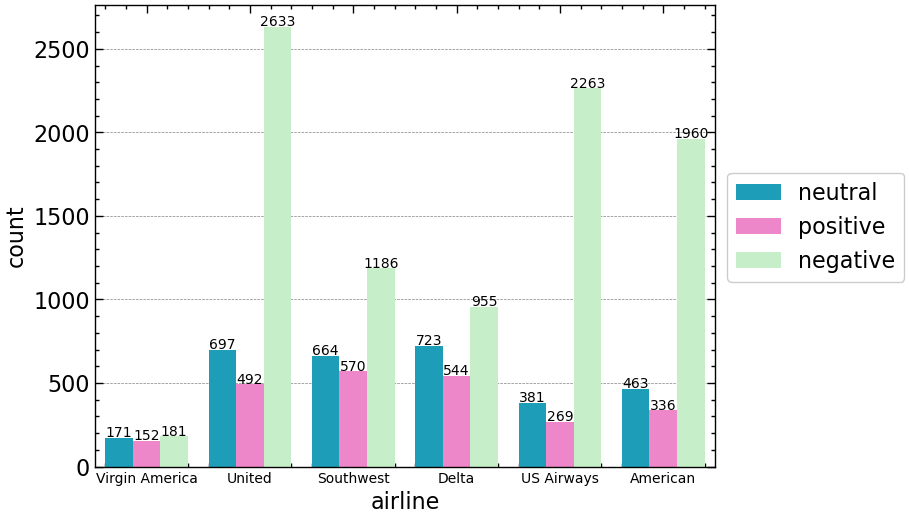

In [6]:
plt.style.use(['science','notebook','grid'])

ax = sns.countplot(x='airline', data = df, hue='airline_sentiment',  palette=['#03AED2','#FF76CE','#BFF6C3'])

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height +7, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.legend(loc=(1.02, 0.4))
plt.xticks(size= 10)

plt.show()

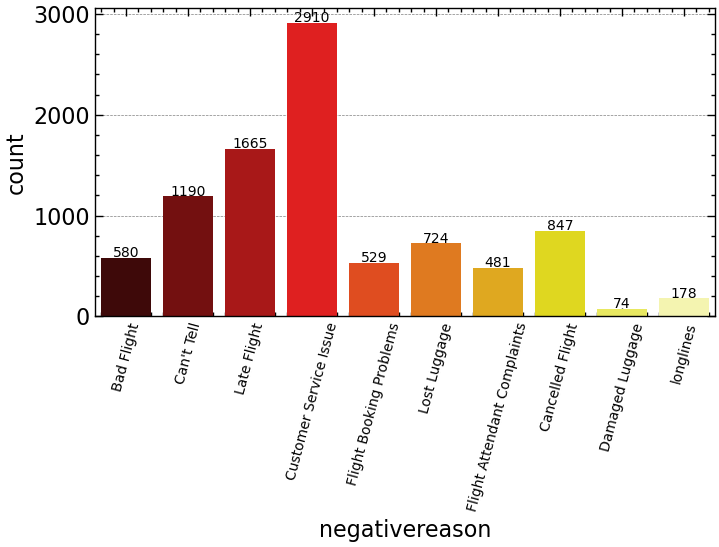

In [7]:
plt.figure(figsize=(8,4))

ax = sns.countplot(x='negativereason', data= df, palette='hot')
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height +7, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )

plt.xticks(rotation=75, size= 10)
plt.show()

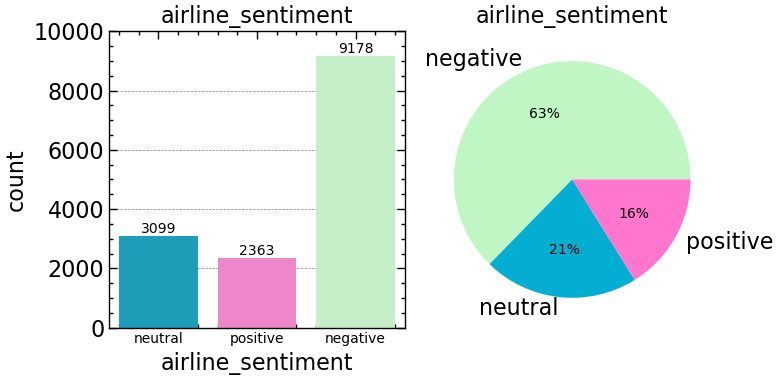

In [8]:
variable = 'airline_sentiment'
plt.figure(figsize = (8,4), dpi=100)
plt.subplot(1,2,1)

ax = sns.countplot(x=variable, data=df, palette=['#03AED2','#FF76CE','#BFF6C3'])

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height +100, 
            s = '{:.0f}'.format(height), 
            ha = 'center'
           )
plt.ylim(0,10000)
plt.xticks(size=10)
plt.title(variable)

# pie chart
plt.subplot(1,2,2)
counts = df[variable].value_counts()
colors = sns.color_palette(['#BFF6C3','#03AED2','#FF76CE'])
plt.pie(counts, labels=counts.index, autopct='%0.0f%%', colors = colors,)
plt.title(variable)


plt.tight_layout()
plt.show()

## Features and Label

In [9]:
data = df[['airline_sentiment','text']]

In [10]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [11]:
X = df['text']
y = df['airline_sentiment']

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 101)

## Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer(stop_words='english')

In [16]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

**DO NOT USE todense() for such a large sparse matrix**

## Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC

## `Naive Bayes`

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
nb = MultinomialNB()

In [20]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

## `logisticRegression`

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(max_iter = 1000)

In [23]:
lr.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## `LinearSVC`

In [24]:
from sklearn.svm import LinearSVC

In [25]:
svc = LinearSVC()

In [26]:
svc.fit(X_train_tfidf, y_train)

LinearSVC()

## Perfomance Matrix Evaluation

In [27]:
plt.style.use('default')

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [29]:
def report(model):
    preds =  model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test)

NB model
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



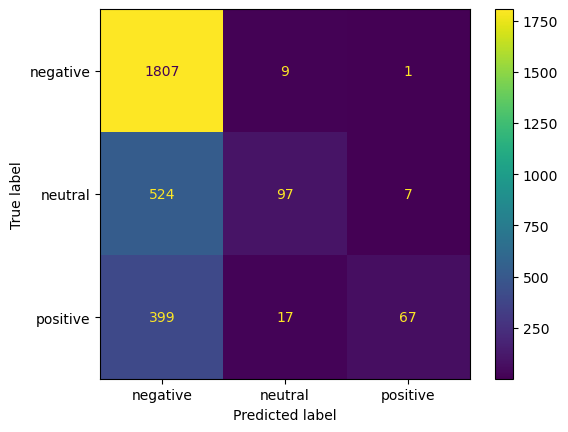

In [30]:
print('NB model')
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



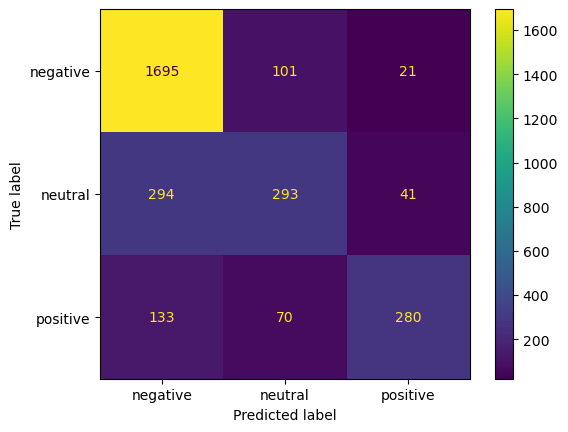

In [31]:
print('Logistic Regression')
report(lr)

LogisticSVC
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



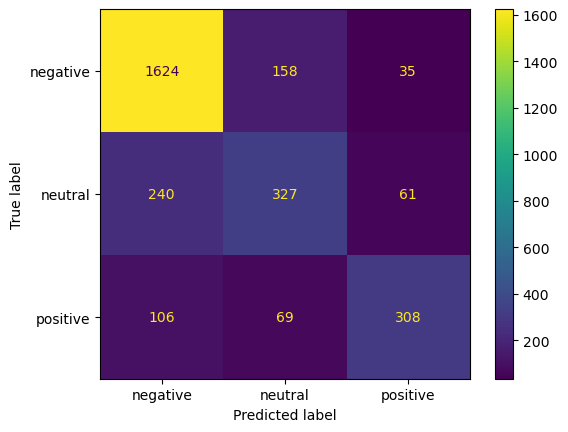

In [32]:
print('LogisticSVC')
report(svc)

### Finalizing a PipeLine for Deployment on  New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc',LinearSVC())])

In [35]:
pipe.fit(df['text'], df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [36]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [37]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [38]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)